In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

%matplotlib inline


In [2]:
data = pd.read_excel('loan2.xlsx')
#raw_data = pd.read_excel('Loan_Default.xlsx')
# print the shape
print(data.shape)

#runs the first 5 rows
data.head(5)

(492, 14)


,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116,0-200,5-7 Years,Male,No,Property - Real Estate,47,House Owner,Services,No,No
1,No Data,critical,TV,2438,No Data,7+ Years,Male,No,Savings Account,52,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144,0-200,2-5 Years,Male,No,Vehicle,48,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073,No Data,2-5 Years,Married,No,Vehicle,25,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276,No Data,7+ Years,Male,No,No Security,59,Renting,Services,No,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Account        492 non-null    object
 1   Account History        492 non-null    object
 2   Reason for the Loan    492 non-null    object
 3   Loan Amount            492 non-null    int64 
 4   Account Savings        492 non-null    object
 5   Employment History     492 non-null    object
 6   Individual Stauts      492 non-null    object
 7   Other Loans            492 non-null    object
 8   Security / Collateral  492 non-null    object
 9   Age                    492 non-null    int64 
 10  Residence Status       492 non-null    object
 11  Job                    492 non-null    object
 12  Completed Other loan?  492 non-null    object
 13  Good Loan              492 non-null    object
dtypes: int64(2), object(12)
memory usage: 53.9+ KB


In [5]:
data['Good Loan'].value_counts(normalize=True)

Yes    0.945122
No     0.054878
Name: Good Loan, dtype: float64

In [6]:
print(data.shape)

(492, 14)


In [7]:
# Checking for null values
data.isnull().sum()

Type of Account          0
Account History          0
Reason for the Loan      0
Loan Amount              0
Account Savings          0
Employment History       0
Individual Stauts        0
Other Loans              0
Security / Collateral    0
Age                      0
Residence Status         0
Job                      0
Completed Other loan?    0
Good Loan                0
dtype: int64

In [12]:
# Investigate all the elements whithin each Feature 

for column in data:
    unique_values = np.unique(data[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature Type of Account is: 4 -- ['No Data' 'Type A' 'Type B' 'Type C']
The number of values for feature Account History is: 3 -- ['Average (known delays)' 'Good' 'critical']
The number of values for feature Reason for the Loan is: 10 -- ['Advance Edu/training' 'All other' 'Buying a New Car' 'Buying a Used Car'
 'Home Devices' 'Home furniture' 'Learning / Edu purposes' 'Renovation'
 'Support for Business' 'TV']
The number of values for feature Loan Amount is: 464
The number of values for feature Account Savings is: 5 -- ['0-200' '1000+' '200-500' '500-1000' 'No Data']
The number of values for feature Employment History is: 5 -- ['0-2 Years' '2-5 Years' '5-7 Years' '7+ Years' 'Unemployed']
The number of values for feature Individual Stauts is: 5 -- ['Divorced' 'Female' 'Female_' 'Male' 'Married']
The number of values for feature Other Loans is: 2 -- ['No' 'Yes']
The number of values for feature Security / Collateral is: 4 -- ['No Security' 'Property - Real Estat

In [13]:
data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

In [ ]:
#Deleting the outlier

data = data[data['Age'] < 100]

data.shape

In [14]:
data['Good Loan'].value_counts()

Yes    465
No      27
Name: Good Loan, dtype: int64

In [15]:
data['Good Loan'].value_counts(normalize=True)

Yes    0.945122
No     0.054878
Name: Good Loan, dtype: float64

In [16]:
data.columns

Index(['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?', 'Good Loan'],
      dtype='object')

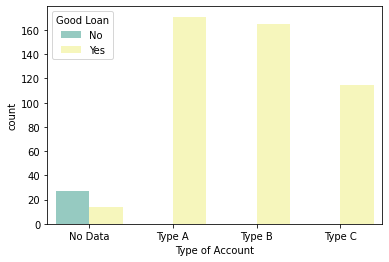

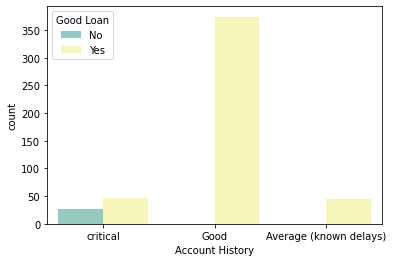

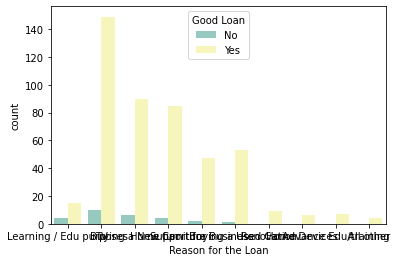

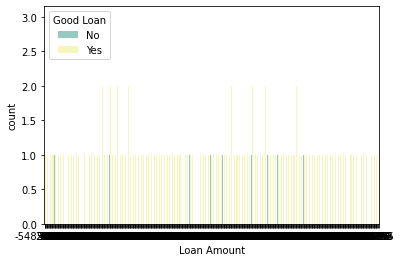

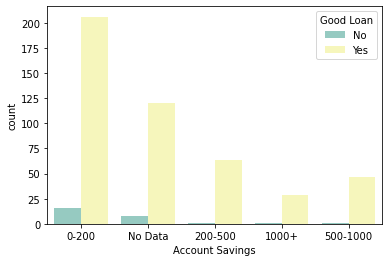

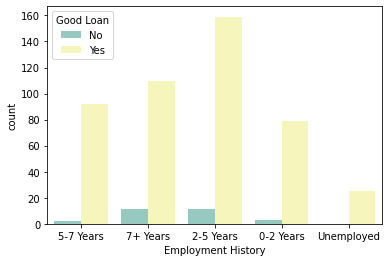

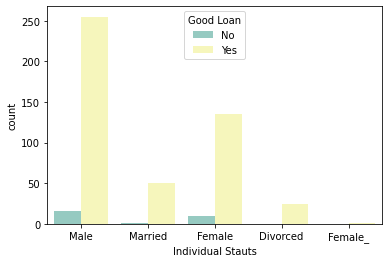

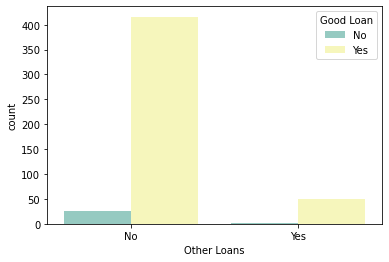

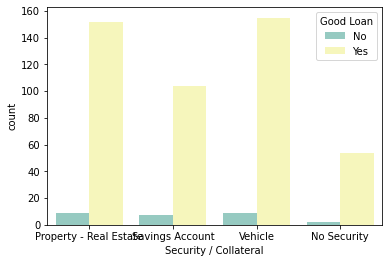

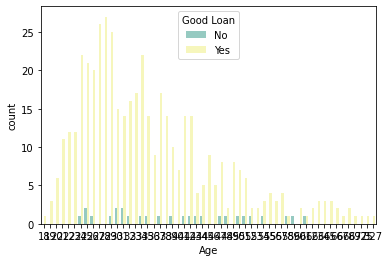

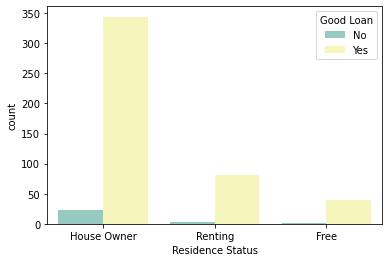

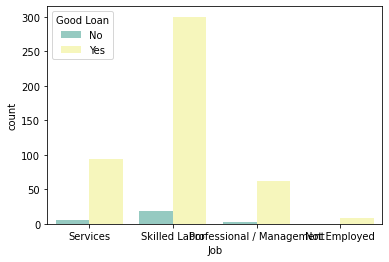

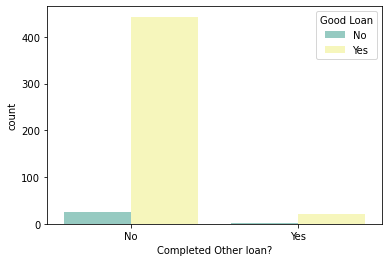

In [17]:
#visualize relationship between target and the predictor variables
features = ['Type of Account', 'Account History', 'Reason for the Loan',
       'Loan Amount', 'Account Savings', 'Employment History',
       'Individual Stauts', 'Other Loans', 'Security / Collateral', 'Age',
       'Residence Status', 'Job', 'Completed Other loan?']
    
for f in features:
    sns.countplot(x = f, data = data, palette = 'Set3', hue = 'Good Loan')
    plt.show()

In [18]:
data.head()

,Type of Account,Account History,Reason for the Loan,Loan Amount,Account Savings,Employment History,Individual Stauts,Other Loans,Security / Collateral,Age,Residence Status,Job,Completed Other loan?,Good Loan
0,No Data,critical,Learning / Edu purposes,2116,0-200,5-7 Years,Male,No,Property - Real Estate,47,House Owner,Services,No,No
1,No Data,critical,TV,2438,No Data,7+ Years,Male,No,Savings Account,52,House Owner,Skilled Labor,No,No
2,No Data,critical,Buying a New Car,2144,0-200,2-5 Years,Male,No,Vehicle,48,House Owner,Skilled Labor,No,No
3,No Data,critical,Home furniture,2073,No Data,2-5 Years,Married,No,Vehicle,25,House Owner,Skilled Labor,Yes,No
4,No Data,critical,Support for Business,1276,No Data,7+ Years,Male,No,No Security,59,Renting,Services,No,No


In [19]:
# Making categorical variables into numeric representation

new_data = pd.get_dummies(data, columns = features)

# Notes:
# We can also do this with Label Encoding and OneHotEncoder from the preprocessing library

print(data.shape)
# print the shape
print(new_data.shape)

# Creating a new 0-1 y variable
#new_raw_data['Loan Approved2'] = 0
new_data['Good Loan'][new_data['Good Loan'] == 'Yes'] = 1
new_data['Good Loan'][new_data['Good Loan'] == 'No'] = 0

# Visualizing the data
new_data

(492, 14)
(492, 567)


<ipython-input-19-681a6274e6bb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Good Loan'][new_data['Good Loan'] == 'Yes'] = 1
<ipython-input-19-681a6274e6bb>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Good Loan'][new_data['Good Loan'] == 'No'] = 0


,Good Loan,Type of Account_No Data,Type of Account_Type A,Type of Account_Type B,Type of Account_Type C,Account History_Average (known delays),Account History_Good,Account History_critical,Reason for the Loan_Advance Edu/training,Reason for the Loan_All other,...,Age_327,Residence Status_Free,Residence Status_House Owner,Residence Status_Renting,Job_Not Employed,Job_Professional / Management,Job_Services,Job_Skilled Labor,Completed Other loan?_No,Completed Other loan?_Yes
0,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
487,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
488,1,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,1,0
489,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
490,1,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [20]:
X= new_data.drop(['Good Loan'],axis=1)
y = new_data['Good Loan']
y = y.astype(int)


print(X.shape)
print(y.shape)

(492, 566)
(492,)


In [ ]:
#from imblearn.over_sampling import SMOTE
#over_sampler = SMOTE(sampling_strategy=sampling_strategy(X_train, y_train,n_samples, t='minority'),k_neighbors=2)
#X_bal, y_bal = over_sampler.fit_resample(X_under, y_under)

In [21]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek()

In [22]:
x_res, y_res = smk.fit_resample(X,y)
#X, y = oversample.fit_resample(X, y)

In [23]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 465, 0: 27})
Resampled dataset shape Counter({0: 464, 1: 464})


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=15)


In [25]:
#using scaler to normalize the distribution 

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
#declare the model,fit and predict on the traindata
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [27]:
#calculate the cm and accuracy score

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[ 2  5]
 [ 1 91]]
0.9393939393939394
              precision    recall  f1-score   support

           0       0.67      0.29      0.40         7
           1       0.95      0.99      0.97        92

    accuracy                           0.94        99
   macro avg       0.81      0.64      0.68        99
weighted avg       0.93      0.94      0.93        99



In [28]:
#calculate area under curve score

from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = rf_classifier.predict_proba(X_test)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example

[1.0, 1.0, 1.0, 1.0, 1.0]

In [29]:
print( roc_auc_score(y_test, prob_y_2) )

0.9557453416149069


In [30]:
#hypertuning process
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [31]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [32]:
rf_randomcv.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 120,
 'criterion': 'entropy'}

In [33]:
rf_randomcv

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [34]:
best_random_grid=rf_randomcv.best_estimator_

In [35]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[ 4  3]
 [ 0 92]]
Accuracy Score 0.9696969696969697
Classification report:               precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.97      1.00      0.98        92

    accuracy                           0.97        99
   macro avg       0.98      0.79      0.86        99
weighted avg       0.97      0.97      0.97        99



In [36]:
from sklearn.metrics import roc_auc_score

# Predict class probabilities
prob_y_2 = best_random_grid.predict_proba(X_test)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5] # Example


[0.99, 0.975, 1.0, 0.9983333333333333, 0.9983333333333333]

In [37]:
print( roc_auc_score(y_test, prob_y_2) )

0.9945652173913043
